In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Feed Forward Neural Network Class**

In [2]:
class FeedforwardNetwork():
    
    def __init__(self, n):
        self.num_inputs = n
        self.output = 1
        self.w = np.random.normal(scale = 1, size = n + 1)
        self.LR = 0.025
        self.MSE = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
        
    def predict(self, x : np.ndarray):
        if (x.shape[0] != self.num_inputs + 1): 
            print("Give correct shape of inputs")
            return None 
        z = self.sigmoid(np.dot(self.w, x))
        
        if z >= 0.9: return 1
        elif z <= 0.1: return 0
        return z

    def predict_all(self, x_train, y_train):
        x = self.preprocess(x_train)
        print("PRED   ACT    INPUT")
        for i in range(len(x_train)):
            print(np.round(self.predict(x[i]), decimals=1), " ", y_train[i], " ", x_train[i])
        
    def dE(self, target, out):
        return target - out

    def preprocess(self, x_train):
        neg_ones = -1 * np.ones(x_train.shape[0]).reshape(-1, 1)
        k = np.hstack((neg_ones, x_train))
        return k

        
    def train(self, x_train, y_train):
        count = 0
        x_train = self.preprocess(x_train)
        num_iter = 20000
        while count < num_iter:
            count += 1
            avgDW = np.zeros_like(x_train[0])
            for i in range(len(x_train)):
                target = y_train[i]
                out = self.sigmoid(np.dot(self.w, x_train[i]))
                delW = self.LR * self.dE(target, out) * out * (1 - out) * x_train[i]
                avgDW = avgDW + delW
            avgDW = avgDW / 4
            self.w = self.w + avgDW
            self.add_MSE(x_train, y_train)
            
    def add_MSE(self, x_train, y_train):
        E = 0
        for i in range(x_train.shape[0]):
            E += 0.5 * (y_train[i] - self.predict(x_train[i])) ** 2
        self.MSE.append(E)

    def plotLoss(self):
        plt.plot(np.arange(1, len(self.MSE) + 1), self.MSE)
        plt.show()

    def getWeights(self):
        return self.w

**XOR (Odd Parity) Function**

In [3]:
X_train_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_train_XOR = np.array([0, 1, 1, 0])


In [4]:
XOR = FeedforwardNetwork(2)
XOR.train(X_train_XOR, Y_train_XOR)
XOR.predict_all(X_train_XOR, Y_train_XOR)

PRED   ACT    INPUT
0.5   0   [0 0]
0.5   1   [0 1]
0.5   1   [1 0]
0.5   0   [1 1]


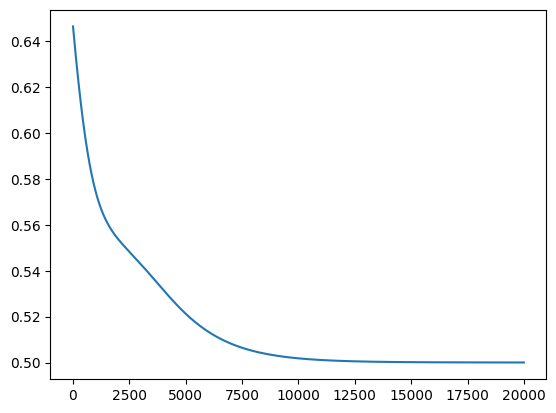

In [5]:
XOR.plotLoss()

**Palindrome Detection (4 bits)**

In [6]:
X_train_Pal_4 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], 
                          [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
                          [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
                          [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])

Y_train_Pal_4 = np.array([1, 0, 0, 0, 
                          0, 0, 1, 0, 
                          0, 1, 0, 0, 
                          0, 0, 0, 1])


In [24]:
PAL4 = FeedforwardNetwork(4)
PAL4.train(X_train_Pal_4, Y_train_Pal_4)
PAL4.predict_all(X_train_Pal_4, Y_train_Pal_4)

PRED   ACT    INPUT
0.3   1   [0 0 0 0]
0.3   0   [0 0 0 1]
0.3   0   [0 0 1 0]
0.3   0   [0 0 1 1]
0.3   0   [0 1 0 0]
0.3   0   [0 1 0 1]
0.3   1   [0 1 1 0]
0.2   0   [0 1 1 1]
0.3   0   [1 0 0 0]
0.2   1   [1 0 0 1]
0.3   0   [1 0 1 0]
0.2   0   [1 0 1 1]
0.3   0   [1 1 0 0]
0.2   0   [1 1 0 1]
0.2   0   [1 1 1 0]
0.2   1   [1 1 1 1]


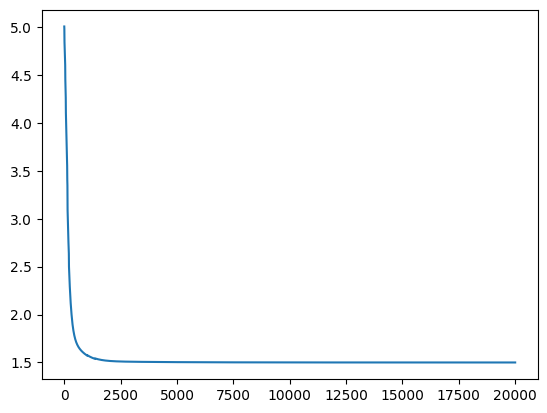

In [25]:
PAL4.plotLoss()


**Palindrome Detection (5 bits)**

In [9]:
X_train_Pal_5 = np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], 
                          [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], 
                          [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], 
                          [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], 
                          [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], 
                          [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], 
                          [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], 
                          [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]])


Y_train_Pal_5 = np.array([1, 0, 0, 0,
                          1, 0, 0, 0, 
                          0, 0, 1, 0, 
                          0, 0, 1, 0, 
                          0, 1, 0, 0, 
                          0, 1, 0, 0, 
                          0, 0, 0, 1, 
                          0, 0, 0, 1])


In [26]:
PAL5 = FeedforwardNetwork(5)
PAL5.train(X_train_Pal_5, Y_train_Pal_5)
PAL5.predict_all(X_train_Pal_5, Y_train_Pal_5)

PRED   ACT    INPUT
0.3   1   [0 0 0 0 0]
0.3   0   [0 0 0 0 1]
0.3   0   [0 0 0 1 0]
0.3   0   [0 0 0 1 1]
0.3   1   [0 0 1 0 0]
0.3   0   [0 0 1 0 1]
0.3   0   [0 0 1 1 0]
0.2   0   [0 0 1 1 1]
0.3   0   [0 1 0 0 0]
0.3   0   [0 1 0 0 1]
0.3   1   [0 1 0 1 0]
0.2   0   [0 1 0 1 1]
0.3   0   [0 1 1 0 0]
0.2   0   [0 1 1 0 1]
0.2   1   [0 1 1 1 0]
0.2   0   [0 1 1 1 1]
0.3   0   [1 0 0 0 0]
0.3   1   [1 0 0 0 1]
0.3   0   [1 0 0 1 0]
0.2   0   [1 0 0 1 1]
0.3   0   [1 0 1 0 0]
0.2   1   [1 0 1 0 1]
0.2   0   [1 0 1 1 0]
0.2   0   [1 0 1 1 1]
0.3   0   [1 1 0 0 0]
0.2   0   [1 1 0 0 1]
0.2   0   [1 1 0 1 0]
0.2   1   [1 1 0 1 1]
0.2   0   [1 1 1 0 0]
0.2   0   [1 1 1 0 1]
0.2   0   [1 1 1 1 0]
0.2   1   [1 1 1 1 1]


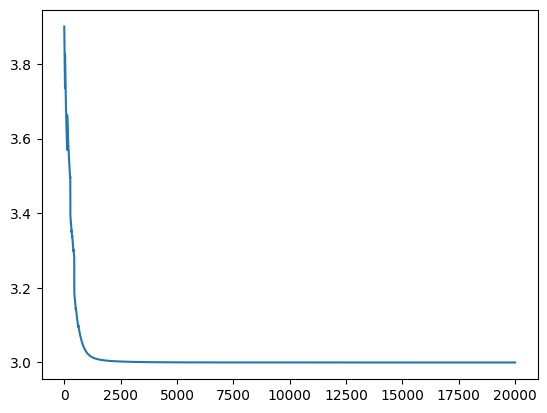

In [27]:
PAL5.plotLoss()

**Majority Function (4 bits)**

In [12]:
X_train_Maj_4 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], 
                          [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
                          [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
                          [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])


Y_train_Maj_4 = np.array([0, 0, 0, 0, 
                          0, 0, 0, 1, 
                          0, 0, 0, 1, 
                          0, 1, 1, 1])


In [13]:
MAJ4 = FeedforwardNetwork(4)
MAJ4.train(X_train_Maj_4, Y_train_Maj_4)
MAJ4.predict_all(X_train_Maj_4, Y_train_Maj_4)

PRED   ACT    INPUT
0   0   [0 0 0 0]
0   0   [0 0 0 1]
0   0   [0 0 1 0]
0.1   0   [0 0 1 1]
0   0   [0 1 0 0]
0.1   0   [0 1 0 1]
0.1   0   [0 1 1 0]
0.8   1   [0 1 1 1]
0   0   [1 0 0 0]
0.1   0   [1 0 0 1]
0.1   0   [1 0 1 0]
0.8   1   [1 0 1 1]
0.1   0   [1 1 0 0]
0.8   1   [1 1 0 1]
0.8   1   [1 1 1 0]
1   1   [1 1 1 1]


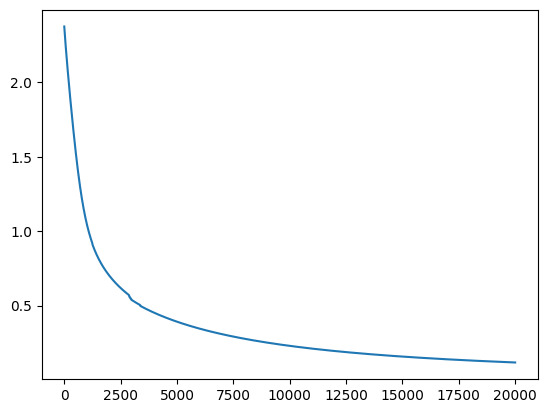

In [14]:
MAJ4.plotLoss()

**Majority Function (5 bits)**

In [15]:
X_train_Maj_5 = np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], 
                          [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], 
                          [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], 
                          [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], 
                          [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], 
                          [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], 
                          [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], 
                          [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]])


Y_train_Maj_5 = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])


In [16]:
MAJ5 = FeedforwardNetwork(5)
MAJ5.train(X_train_Maj_5, Y_train_Maj_5)
MAJ5.predict_all(X_train_Maj_5, Y_train_Maj_5)


PRED   ACT    INPUT
0   0   [0 0 0 0 0]
0   0   [0 0 0 0 1]
0   0   [0 0 0 1 0]
0.1   0   [0 0 0 1 1]
0   0   [0 0 1 0 0]
0.1   0   [0 0 1 0 1]
0.1   0   [0 0 1 1 0]
0.9   1   [0 0 1 1 1]
0   0   [0 1 0 0 0]
0.1   0   [0 1 0 0 1]
0.1   0   [0 1 0 1 0]
0.9   1   [0 1 0 1 1]
0.1   0   [0 1 1 0 0]
0.9   1   [0 1 1 0 1]
0.9   1   [0 1 1 1 0]
1   1   [0 1 1 1 1]
0   0   [1 0 0 0 0]
0.1   0   [1 0 0 0 1]
0.1   0   [1 0 0 1 0]
0.9   1   [1 0 0 1 1]
0.1   0   [1 0 1 0 0]
0.9   1   [1 0 1 0 1]
0.9   1   [1 0 1 1 0]
1   1   [1 0 1 1 1]
0.1   0   [1 1 0 0 0]
0.9   1   [1 1 0 0 1]
0.9   1   [1 1 0 1 0]
1   1   [1 1 0 1 1]
0.9   1   [1 1 1 0 0]
1   1   [1 1 1 0 1]
1   1   [1 1 1 1 0]
1   1   [1 1 1 1 1]


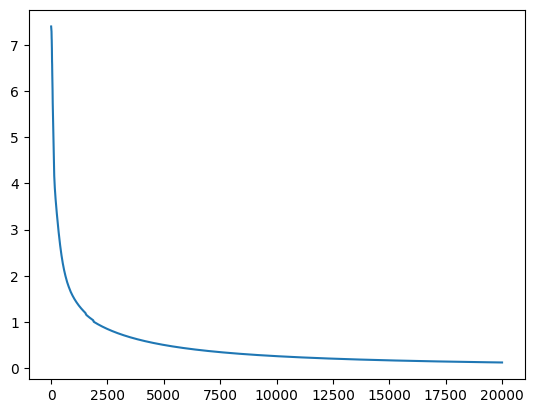

In [17]:
MAJ5.plotLoss()

**Even Parity (4 bits)**

In [18]:
X_train_Evepar_4 = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], 
                             [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], 
                             [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], 
                             [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])


Y_train_Evepar_4 = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])


In [19]:
EP4 = FeedforwardNetwork(4)
EP4.train(X_train_Evepar_4, Y_train_Evepar_4)
EP4.predict_all(X_train_Evepar_4, Y_train_Evepar_4)


PRED   ACT    INPUT
0.5   1   [0 0 0 0]
0.5   0   [0 0 0 1]
0.5   0   [0 0 1 0]
0.5   1   [0 0 1 1]
0.5   0   [0 1 0 0]
0.5   1   [0 1 0 1]
0.5   1   [0 1 1 0]
0.5   0   [0 1 1 1]
0.5   0   [1 0 0 0]
0.5   1   [1 0 0 1]
0.5   1   [1 0 1 0]
0.5   0   [1 0 1 1]
0.5   1   [1 1 0 0]
0.5   0   [1 1 0 1]
0.5   0   [1 1 1 0]
0.5   1   [1 1 1 1]


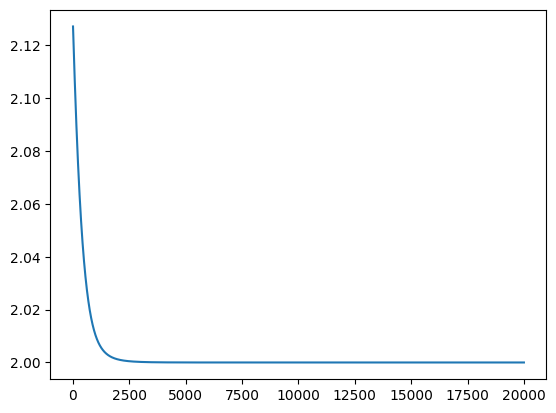

In [20]:
EP4.plotLoss()

**Even Parity (5 bits)**

In [21]:
X_train_Evepar_5 = np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], 
                             [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], 
                             [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], 
                             [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], 
                             [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], 
                             [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], 
                             [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], 
                             [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]])


Y_train_Evepar_5 = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])


In [22]:
EP5 = FeedforwardNetwork(5)
EP5.train(X_train_Evepar_5, Y_train_Evepar_5)
EP5.predict_all(X_train_Evepar_5, Y_train_Evepar_5)

PRED   ACT    INPUT
0.5   1   [0 0 0 0 0]
0.5   0   [0 0 0 0 1]
0.5   0   [0 0 0 1 0]
0.5   1   [0 0 0 1 1]
0.5   0   [0 0 1 0 0]
0.5   1   [0 0 1 0 1]
0.5   1   [0 0 1 1 0]
0.5   0   [0 0 1 1 1]
0.5   0   [0 1 0 0 0]
0.5   1   [0 1 0 0 1]
0.5   1   [0 1 0 1 0]
0.5   0   [0 1 0 1 1]
0.5   1   [0 1 1 0 0]
0.5   0   [0 1 1 0 1]
0.5   0   [0 1 1 1 0]
0.5   1   [0 1 1 1 1]
0.5   0   [1 0 0 0 0]
0.5   1   [1 0 0 0 1]
0.5   1   [1 0 0 1 0]
0.5   0   [1 0 0 1 1]
0.5   1   [1 0 1 0 0]
0.5   0   [1 0 1 0 1]
0.5   0   [1 0 1 1 0]
0.5   1   [1 0 1 1 1]
0.5   1   [1 1 0 0 0]
0.5   0   [1 1 0 0 1]
0.5   0   [1 1 0 1 0]
0.5   1   [1 1 0 1 1]
0.5   0   [1 1 1 0 0]
0.5   1   [1 1 1 0 1]
0.5   1   [1 1 1 1 0]
0.5   0   [1 1 1 1 1]


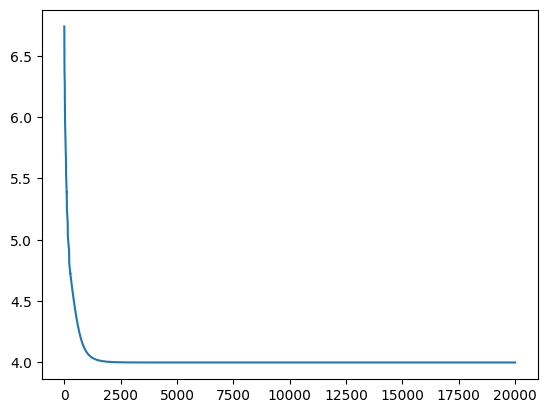

In [23]:
EP5.plotLoss()
